# OBJECTIVE :#

1.   <b>APPLYING LOGISTIC REGRESSION WITH BOW VECTORIZATION
 * PERFORMING PERTUBATION TEST TO CHECK WHETHER OUR DATA  FEATURES ARE COLLINER OR NOT AND PLOTTING THE RESULT
 *   FINDING THE BEST HYPERPARAMETER USING GRIDSEARCHCV WITH TRAIN DATA AND CROSS-VALIDATION DATA BY PLOTTING THE RESLUTS OF VAROIUS TRAIN DATA AND CROSS VALIDATION DATA
 * USING THE APROPRIATE VALUE OF HYPERPARAMETER ,TESTING ACCURACY ON TEST DATA
    USING F1-SCORE
 * PLOTTING THE CONFUSION MATRIX TO GET THE  PRECISOIN ,RECALL VALUE WITH HELP OF HEATMAP
  * PRINTING THE TOP 20 FEATURES FOR BOTH POSITIVE AND NEGATIVE WORDS
  #




In [2]:
from sklearn.model_selection import train_test_split          #importing the necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import *
from sklearn import naive_bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn import *
import warnings
warnings.filterwarnings("ignore")


In [3]:
final_processed_data=pd.read_csv("C:/Users/Mayank/Desktop/machine learning/appliedaicourse data/lecture 18  knn/final_new_data.csv")#loading the preprocessed data  with 100k points into dataframe 

In [4]:
# getting the counts of 0 and 1 in "SCORE" column to know whether it is unbalanced data or not
count_of_1=0
count_of_0=0
for i in final_processed_data['Score']:
   if i==1:
    count_of_1+=1
   else:
    count_of_0+=1
print(count_of_1)
print(count_of_0)
#it is an imbalanced dataset

88521
11479


In [5]:
#spliiting the data into train and test data
x_train,x_test,y_train,y_test=model_selection.train_test_split(final_processed_data['CleanedText'].values,final_processed_data['Score'].values,test_size=0.2,shuffle=False)

In [6]:
vectorizer=CountVectorizer(min_df=10)#building the vertorizer with word counts equal and more then 2
train_bow=vectorizer.fit_transform(x_train)#fitting the model on training data
print(train_bow.shape)

(80000, 7677)


In [7]:
from sklearn.preprocessing import StandardScaler #standarizing the training  data  
x_train_data=StandardScaler( with_mean=False).fit_transform(train_bow)
print(x_train_data.shape)

(80000, 7677)


In [8]:
test_bow=vectorizer.transform(x_test)#fitting the bow model on test data
print("shape of x_test after bow vectorization ",test_bow.shape)
x_test_data=StandardScaler( with_mean=False).fit_transform(test_bow)#standarizing the test data
print("shape of x_test after standardization ",x_test_data.shape)

shape of x_test after bow vectorization  (20000, 7677)
shape of x_test after standardization  (20000, 7677)


In [9]:
#using time series split method for cross-validation score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10) 
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
data=[10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]#range of hyperparameter




In [10]:
lr=LogisticRegression(penalty='l2',class_weight={1:.5,0:.5})#building logistic regression model
tuned_parameters=[{'C':data}]

In [10]:
#applying the model of logistic regression and using gridsearchcv to find the best hyper parameter
%time
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(lr, tuned_parameters, scoring = 'f1', cv=tscv,n_jobs=-1)#building the gridsearchcv model
model.fit(x_train_data, y_train)#fiitting the training data

print(model.best_estimator_)#printing the best_estimator
print(model.score(x_test_data, y_test))#predicting  f1 score on test data

Wall time: 0 ns
LogisticRegression(C=0.001, class_weight={1: 0.5, 0: 0.5}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.952504987808


In [11]:
lr=LogisticRegression(C=0.001,penalty='l2',class_weight={1:.5,0:.5},n_jobs=-1)#again building the model to find best hyperparameter
lr.fit(x_train_data,y_train)#fitting the training data
z=lr.decision_function(x_train_data)#checking the signed distance of a point from hyperplane
print(z)#printing the signed distance

[ 3.55845076  2.26483878  1.98815951 ...,  7.38021825 -2.68550859
  4.84653495]


In [12]:
wieght_vector=lr.coef_#getting the weight vector
print(wieght_vector.shape)#wieght vector shape
print(wieght_vector[:20])

(1, 7677)
[[-0.00404381 -0.0055471  -0.00635504 ...,  0.0277215  -0.00865251
   0.00910158]]


# PERFORMING SPARSITY CHECK WITH L1 REGULARIZATION

In [11]:
first_20k_points=x_train_data[:20000] #first 20k points

In [12]:
#using time series split method for cross-validation score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10) 
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
data=[10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]#range of hyperparameter


In [13]:
lr=LogisticRegression(penalty='l1',class_weight={1:.5,0:.5})#building logistic regression model
tuned_parameters=[{'C':data}]

In [14]:
#applying the model of logistic regression and using gridsearchcv to find the best hyper parameter
%time
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(lr, tuned_parameters, scoring = 'f1', cv=tscv,n_jobs=-1)#building the gridsearchcv model
model.fit(first_20k_points, y_train[:20000])#fiitting the training data

print(model.best_estimator_)#printing the best_estimator


Wall time: 0 ns
LogisticRegression(C=0.1, class_weight={1: 0.5, 0: 0.5}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [15]:
lr=LogisticRegression(C=0.1,penalty='l1',class_weight={1:.5,0:.5},n_jobs=-1)#again building the model to find best hyperparameter
lr.fit(first_20k_points,y_train[:20000])#fitting the training data



LogisticRegression(C=0.1, class_weight={1: 0.5, 0: 0.5}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [16]:
wieght_vector=lr.coef_#getting the weight vector
print(wieght_vector.shape)#wieght vector shape
print(wieght_vector[:20])

(1, 7677)
[[ 0.          0.00692072  0.         ...,  0.          0.          0.        ]]


In [17]:
np.count_nonzero(wieght_vector)

1625

# THUS HERE ONLY 1625 FEATURES ARE NON_ZERO AND REST OF FEATURES WIEGHTS HAVE BECOME ZERO..SPARSITY CHECK IS POSITIVE

 ***************************************************************************************************

#  PERTUBATION TEST : #
    AIM:    TO CHECK FOR MULTI COLLINEARITY  OF FEATURES
    STEPS
  1.   GETTING THE WIEGHT VECTOR FROM  MODEL AND SAVING IT
  2.   ADDING  NOISE TO THE  TRAINING DATA TO GET NEW  TRAINING  DATA
  3. FITTING THE MODEL AGAIN ON NEW DATA
  4. GETTING THE WIEGHT VECTOR FROM THIS MODEL
  5.ADDING SMALL VALUE TO WEIGHT VECTOR OF BOTH TRAINNG  DATA TO REMOVE ANY ERROR
  6. FINDING THE PERCENTAGE CHANGE VECTOR 
  7. GEETING HOW MANY GEATURE HAS CHANGED USING SOME THRESHOLD VALUE( HERE TAKING IT AS  100)
  8. PLOTTING THE  QUANTILES WITH THIER PERCENTAGE WIGHT  VALUE TO CHECK IF COLLINEARITY EXITS OR NOT
  
  #  RESULT : TO KNOW WHETHER FEATURES ARE MULTICOLLINEAR OR NOT  #
#   AND TO KNOW WHETHER MODEL IS RELIABLE OR NOT #
    
  

In [19]:
#here,we are adding noise to the data 
from scipy.stats import norm
noise=norm.rvs(size=1)#noise
x_train_data.data+=noise#adding noise


In [20]:
print('shape of our new train data  after adding noise is : ',x_train_data.shape)#printing shape of new training data


shape of our new train data  after adding noise is :  (80000, 7677)


In [21]:
#uilding the model using timeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10) # 10 spilts cross validation
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
data=[10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]#value range of hyper parameter for grid searchcv
lr=LogisticRegression(penalty='l2',class_weight={1:.5,0:.5},n_jobs=-1)#building the model
tuned_parameters=[{'C':data}]


In [22]:
%time
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(lr, tuned_parameters, scoring = 'f1', cv=tscv,n_jobs=-1)#building the gridsearchcv model
model.fit(x_train_data, y_train)#fiitting the training data

print('best estimator of our new data is: ',model.best_estimator_)#printing the best_estimator

Wall time: 0 ns
best estimator of our new data is:  LogisticRegression(C=0.001, class_weight={1: 0.5, 0: 0.5}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [23]:
# again building the model for finding the wieght vector of the words from model
lr=LogisticRegression(C=0.001,penalty='l2',class_weight={1:.5,0:.5},n_jobs=-1)#building the logistic regression model
lr.fit(x_train_data,y_train)#fiting the training model
new_wieght_vector=lr.coef_
print(new_wieght_vector.shape)#printing shape of wieght vector

(1, 7677)


In [24]:
percent_change_vec=np.ones((1,17204))#generating the percent_change_vetor to store the percentage change  values for each word

In [25]:
wieght_vector=wieght_vector+10**-6 #adding some values to wieght vector to avoid error while division
      
new_wieght_vector=new_wieght_vector+10**-6 #adding some values to wieght vector to avoid error while division
      
percent_change_vec=abs((wieght_vector-new_wieght_vector)/wieght_vector)*100#calculating the percentage change in the vector


In [26]:
x=(wieght_vector[0][2]-new_wieght_vector[0][2])/wieght_vector[0][2]#just checking randomly that every value is positve in percent_change_vector 
print(x)

6124.13518164


In [27]:
print('shape of percent change wieght vector is', percent_change_vec.shape)#printing shape of percent_change_vector

shape of percent change wieght vector is (1, 7677)


In [28]:
per_change_df=pd.DataFrame(percent_change_vec.T,columns=['CHANGE'])#building a dataframe from wight vector

In [29]:
per_change_df.head()#getting first 5 values 

,CHANGE
0,4.114007e+05
1,1.793059e+02
2,6.124135e+05
3,6.546318e+05
4,1.072202e+06


In [30]:
sorted_Df=per_change_df.sort_values('CHANGE',ascending=True,axis=0)#sorting the dataframe to calculate the quantiles values
sorted_Df.describe()#describe function

,CHANGE
count,7.677000e+03
mean,8.163010e+05
std,8.943429e+05
min,3.020788e-01
25%,6.567501e+04
50%,5.955684e+05
75%,1.224095e+06
max,1.119868e+07


In [31]:
quantiles=list( i/100 for i in range(0,101,5))#building the list of quantiles value 
for i in quantiles:
  print('sorted_Data {:.2f}th quantiles is {:7.3f}'.format(i,sorted_Df['CHANGE'].quantile(i)))#printing the quantiles and thier coreesponding values

      
      
    
    

sorted_Data 0.00th quantiles is   0.302
sorted_Data 0.05th quantiles is  36.889
sorted_Data 0.10th quantiles is  62.904
sorted_Data 0.15th quantiles is 102.959
sorted_Data 0.20th quantiles is 528.746
sorted_Data 0.25th quantiles is 65675.014
sorted_Data 0.30th quantiles is 180460.231
sorted_Data 0.35th quantiles is 279055.538
sorted_Data 0.40th quantiles is 378386.003
sorted_Data 0.45th quantiles is 482543.855
sorted_Data 0.50th quantiles is 595568.425
sorted_Data 0.55th quantiles is 703414.610
sorted_Data 0.60th quantiles is 811447.629
sorted_Data 0.65th quantiles is 937978.515
sorted_Data 0.70th quantiles is 1076080.247
sorted_Data 0.75th quantiles is 1224094.822
sorted_Data 0.80th quantiles is 1410348.577
sorted_Data 0.85th quantiles is 1629372.501
sorted_Data 0.90th quantiles is 1950475.872
sorted_Data 0.95th quantiles is 2545719.779
sorted_Data 1.00th quantiles is 11198680.280


In [32]:
quantiles=list( i/100 for i in range(95,101,1))#printing the last percentiles values because this region is showing abrupt change
percent_change_list=[]#empty percent_change
for i in quantiles:
  print('sorted_Data {:.2f}th quantiles is {:7.3f}'.format(i,sorted_Df['CHANGE'].quantile(i)))
  percent_change_list.append(sorted_Df['CHANGE'].quantile(i))#building the list

sorted_Data 0.95th quantiles is 2545719.779
sorted_Data 0.96th quantiles is 2740753.344
sorted_Data 0.97th quantiles is 2907890.640
sorted_Data 0.98th quantiles is 3243208.220
sorted_Data 0.99th quantiles is 3921466.304
sorted_Data 1.00th quantiles is 11198680.280


In [33]:
print(percent_change_list)
my_formatted_list = [ '%.2f' % elem for elem in percent_change_list ]#formatted list with string values in it
my_formatted_list=[float(i) for i in my_formatted_list]#formatted list with flaot values in it
print(my_formatted_list)#printing formatted list
print(quantiles)#printing quantiles


[2545719.778685397, 2740753.3441018667, 2907890.6404516995, 3243208.219537627, 3921466.30395979, 11198680.279986566]
[2545719.78, 2740753.34, 2907890.64, 3243208.22, 3921466.3, 11198680.28]
[0.95, 0.96, 0.97, 0.98, 0.99, 1.0]


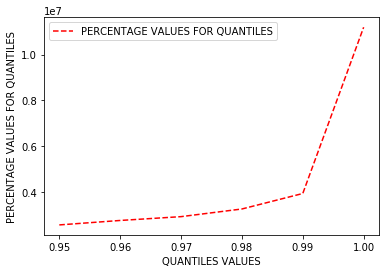

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.show() 
plt.xlabel('QUANTILES VALUES')
plt.ylabel('PERCENTAGE VALUES FOR QUANTILES')
plt.plot(quantiles,my_formatted_list,'r--' ,label='PERCENTAGE VALUES FOR QUANTILES')
plt.legend(loc='best')

### FROM THE ABOVE VISUALIZATION , MAIN POINTS ARE:.###

1.   THAT ONLY 1% OF FEATURES GOT AFFECTED AFTER ADDING NOISE TO THE DATA. 
2.    VERY LESS COLLINEARITY OF DATA IS PRESENT  ,BECAUSE MOST OF THE WEIGHT VECTORS VALUES  REMAINS SAME 
3.THERFORE, OUR MODEL IS RELIABLE AND WE CAN PROCEED FURTHER TO CHECK ACCURACY ON TEST DATA 



## CALCULATING  THE BEST HYPERPARAMETER ON TRAIN  DATA AND CALCULATING THE ACCURACY USING F1-SCORE AND PLOTTING IT  #

In [35]:
#using time series split method for cross-validation score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10) 
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
data=[10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]#range of hyperparameter

In [36]:
lr=LogisticRegression(penalty='l2',class_weight={1:.5,0:.5},n_jobs=-1)#building logistic regression model
tuned_parameters=[{'C':data}]

In [37]:
#applying the model of logistic regression and using gridsearchcv to find the best hyper parameter
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(lr, tuned_parameters, scoring = 'f1', cv=tscv,n_jobs=-1)#building the gridsearchcv model
model.fit(x_train_data, y_train)#fiitting the training data

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=10),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight={1: 0.5, 0: 0.5}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [38]:
results=pd.DataFrame(model.cv_results_)# getting varoius cv_scores and train_scores various values of alpha given as parameter and storing it in a dataframe
results#printing the dataframe

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.371375,0.009375,0.947138,0.957927,0.0001,{'C': 0.0001},3,0.943679,0.951138,0.951348,...,0.947087,0.960685,0.947204,0.961764,0.947306,0.962298,0.915326,0.007654,0.003052,0.003410
1,2.322609,0.007812,0.956032,0.979998,0.001,{'C': 0.001},1,0.949230,0.982080,0.958458,...,0.956785,0.979595,0.953855,0.979777,0.958485,0.979060,1.347613,0.007812,0.003460,0.000774
2,4.062930,0.001562,0.954233,0.991260,0.01,{'C': 0.01},2,0.954569,0.996582,0.957323,...,0.952264,0.988897,0.949273,0.988257,0.952498,0.987060,2.303116,0.004687,0.003186,0.002811
3,7.760476,0.007813,0.946258,0.995863,0.1,{'C': 0.1},4,0.955969,0.999611,0.949000,...,0.942686,0.993463,0.942195,0.992322,0.943229,0.990765,5.338173,0.007813,0.004786,0.002862
4,14.133621,0.007087,0.937421,0.997608,1,{'C': 1},5,0.951520,1.000000,0.941962,...,0.933176,0.995794,0.932231,0.994546,0.941011,0.991688,9.638477,0.006497,0.006530,0.002659
5,19.005972,0.009486,0.932540,0.997968,10,{'C': 10},6,0.946958,1.000000,0.936861,...,0.929044,0.996475,0.925472,0.995262,0.940762,0.991773,14.429250,0.005588,0.007443,0.002636
6,19.856343,0.007924,0.927830,0.998044,100,{'C': 100},7,0.936848,1.000000,0.922755,...,0.930328,0.996389,0.924585,0.995407,0.940679,0.991742,13.631132,0.004942,0.006365,0.002637
7,26.530732,0.009849,0.925073,0.998082,1000,{'C': 1000},8,0.929874,1.000000,0.907760,...,0.930013,0.996389,0.922078,0.995680,0.940154,0.992032,29.809774,0.005851,0.008258,0.002551
8,30.367647,0.004799,0.923287,0.998256,10000,{'C': 10000},9,0.927953,1.000000,0.903832,...,0.919329,0.997717,0.921226,0.995689,0.940679,0.991688,29.880901,0.004307,0.008920,0.002598


[5.2862463174302876, 4.3968129672200318, 4.5767022275204798, 5.3741652913736448, 6.2578765329667103, 6.7460040101474439, 7.2170415778466062, 7.4926855714309131, 7.6713443582323571]


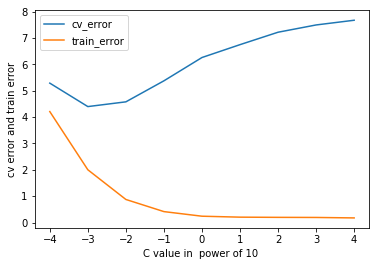

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt


mean_test_score=list(results['mean_test_score'])#taking mean_test_score values of various alpha into a list
mean_train_score=list(results['mean_train_score'])#taking mean_train_score values of varoius alpha into a list
cv_error_list=[]
train_error_list=[]
for i  in mean_test_score:
   i=1-i
   i=i*100
   cv_error_list.append(i)#appending the list with cv_error 
for i  in mean_train_score:
   i=1-i
   i=i*100
   train_error_list.append(i)#appending  the list with train_error     
    
print(cv_error_list)
C_values_in_10_power=[-4,-3,-2,-1,0,1,2,3,4]#list of alpha values in power of 10
plt.plot(C_values_in_10_power,cv_error_list,label='cv_error')#plotting alpha with cv_error
plt.plot(C_values_in_10_power,train_error_list,label='train_error')#plotting aplhawith train_error
plt.xlabel('C value in  power of 10 ')
plt.ylabel('cv error and train error')
plt.legend(loc='best')


# <font color=DarkSlateGray>From here,the best hyperparameter value is c=0.001 or alpha=1000 <font>#

# NOW GETTING THE TOP 30 FEATURES WORDS FOR POSITIVE AND NEGATIVE WORDS#

In [40]:
#building the model using timeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10) # 10 spilts cross validation
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.001,penalty='l2',class_weight={1:.5,0:.5},n_jobs=-1)#building logistic regression model
lr.fit(x_train_data,y_train)

LogisticRegression(C=0.001, class_weight={1: 0.5, 0: 0.5}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [41]:
z=lr.coef_[0]#getting the wieght of the vector 
print(z)#printing the wieght of the vector

[-0.00411401 -0.00549033 -0.00612414 ...,  0.02776355 -0.00862934
  0.00916463]


In [42]:
a=z.argsort()
print('shape of wieght vector is:',a.shape)
top_30_positive=np.take(vectorizer.get_feature_names(),a[17174:])
top_30_negative=np.take(vectorizer.get_feature_names(),a[:30])

shape of wieght vector is: (7677,)


In [43]:
print("POSITVE WORDS\t|\tNEGATIVE WORDS")
for i,j in zip(top_30_positive,top_30_negative):
    print( '{}\t\t|\t\t{}'.format(i,j) )#printing the postive and negative words

POSITVE WORDS	|	NEGATIVE WORDS


# <font color=MidnightBlue><u><i>USING BEST HYPERPARAMETER VALUE ON TEST DATA AND PLOTTING THE CONFUSION MATRIX WITH HEATMAP <u><i><font>#

Accuracy on test set: 96.320%
Precision on test set: 0.961
Recall on test set: 0.998
F1-Score on test set: 0.979
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



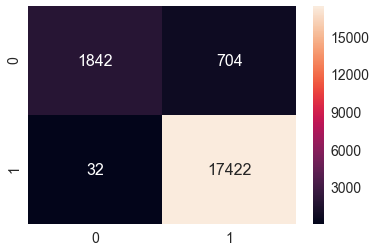

In [44]:
#Testing Accuracy on Test data  
import seaborn as sns #importing seaborn as sns
from sklearn.metrics import *#importing varoius metrics from sklearn
#building the model
lr.fit(x_test_data,y_test)
y_pred = lr.predict(x_test_data) 
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))#printing accuracy
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))#printing precision score
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred))) #printing recall
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred))) 
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n") 
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2)) #generating the heatmap for confusion matrix
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


# <font color=MediumOrchid><u><i>FROM THE ABOVE OBSERVATIONS ,IT IS FOUND THAT THE BEST HYPERPARAMETER IS FOUND AS APLHA=1000  AND IT IS ALSO HAVING HIGH PRECISION,RECALL VALUE ON TEST DATA<u><i> <font>

In [45]:
#BOW VECTORIZATION IS COMPLETED FOR LOGISTIC REGRESSION